In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (18, 6)

import numpy as np

sample_rate = 48000
tau = 2.0 * np.pi

Populating the interactive namespace from numpy and matplotlib


In [2]:
def gen_linear_ramp(start, end, size):
    step = (end - start) / size
    curr = start
    out = [curr]
    for i in range(0, size):
        curr += step
        out.append(curr)
    return np.array(out)

In [3]:
def exp_ramp(start, end, attack_ms, sample_rate, overshoot=0.1):
    attack_samples = floor(sample_rate / 1000.0 * attack_ms)
    print("expected attack samples: %s" % attack_samples)
    
    overshot = 1 + overshoot
    ratio = overshoot / overshot
    attack_coef = 1.0 - np.exp(np.log(ratio) / attack_samples)
    print("attack coef: %s" % attack_coef)
    
    # always calculate `out` from 0 to 1, so the curve of the ramp stays consistent.
    out = 0.0
    sample_count = 0

    # but scale the value when it hits the output array
    offset = start
    out_mult = end - start
    out_arr = [offset]
    while 1:
        out += attack_coef * (overshot - out)
        out_arr.append(offset + (out_mult * out))
        if out > 1.0:
            out = 1.0
            break
        else:
            sample_count += 1
    print("reached target in %s samples" % sample_count)
    return np.array(out_arr), sample_count

In [4]:
def plot_attacks(start, end, attack_ms, sample_rate, overshoot):
    exp, _ = exp_ramp(start, end, attack_ms, sample_rate, overshoot)
    plot(exp)
    plot(gen_linear_ramp(start, end, sample_rate / 1000 * attack_ms))

expected attack samples: 13230.0
attack coef: 0.000181230384013
reached target in 13229 samples


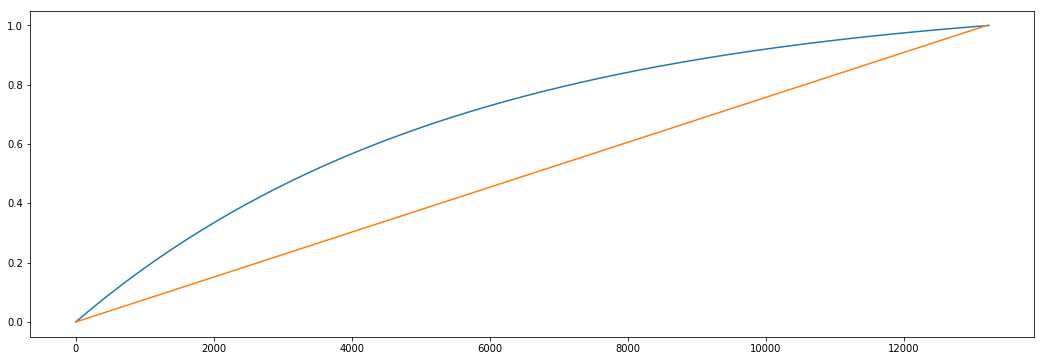

In [5]:
plot_attacks(0.0, 1.0, 300, 44100, 0.1)

expected attack samples: 14400.0
attack coef: 0.000166506641286
reached target in 14399 samples


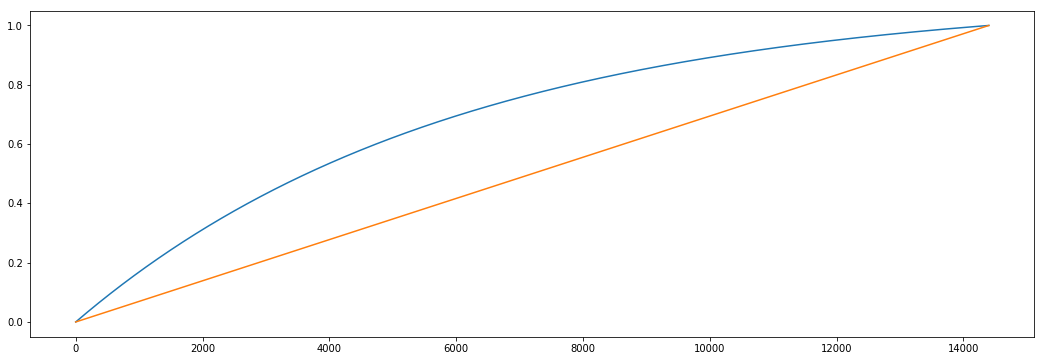

In [6]:
plot_attacks(0.0, 1.0, 300, 48000, 0.1)

expected attack samples: 28800.0
attack coef: 4.83961054941e-05
reached target in 28800 samples


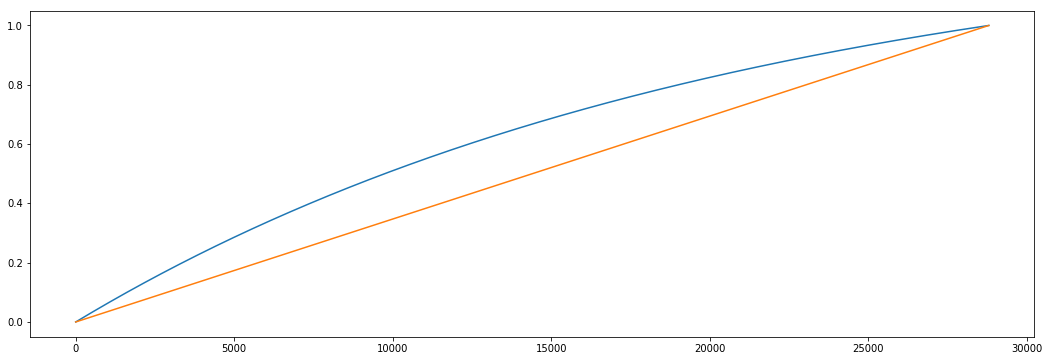

In [7]:
plot_attacks(0.0, 1.0, 300, 96000, 0.33)

expected attack samples: 26460.0
attack coef: 0.000115054697319
reached target in 26460 samples


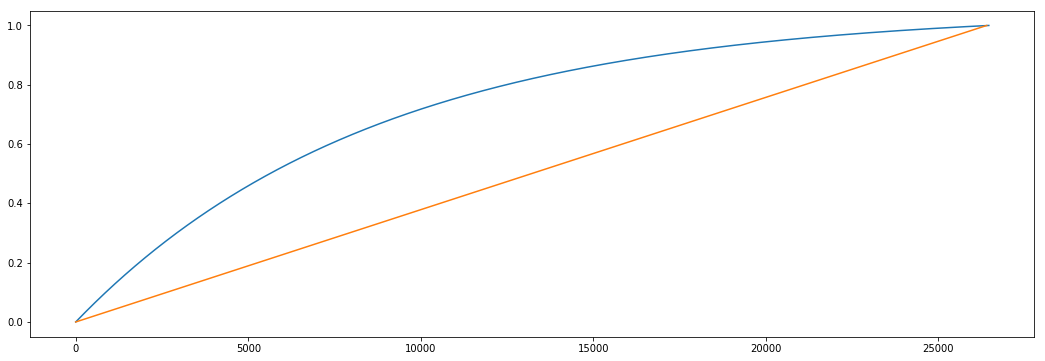

In [8]:
plot_attacks(0.0, 1.0, 600, 44100, 0.05)

expected attack samples: 26460.0
attack coef: 0.000115054697319
reached target in 26460 samples


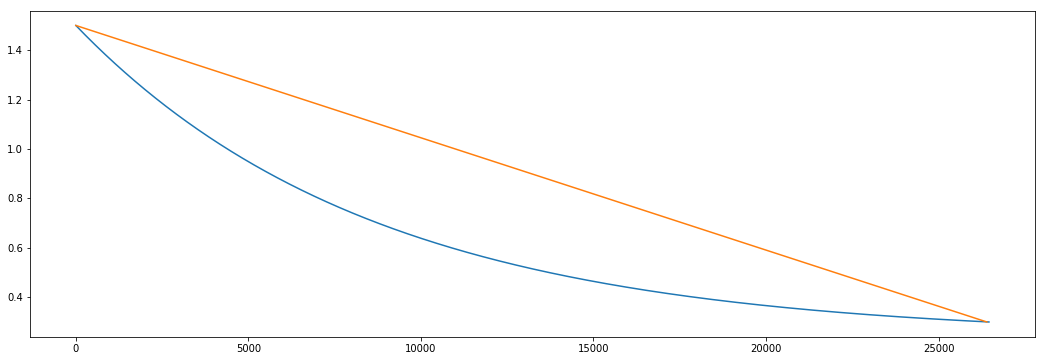

In [9]:
plot_attacks(1.5, 0.3, 600, 44100, 0.05)

expected attack samples: 26460.0
attack coef: 3.91561468961e-05
reached target in 26459 samples


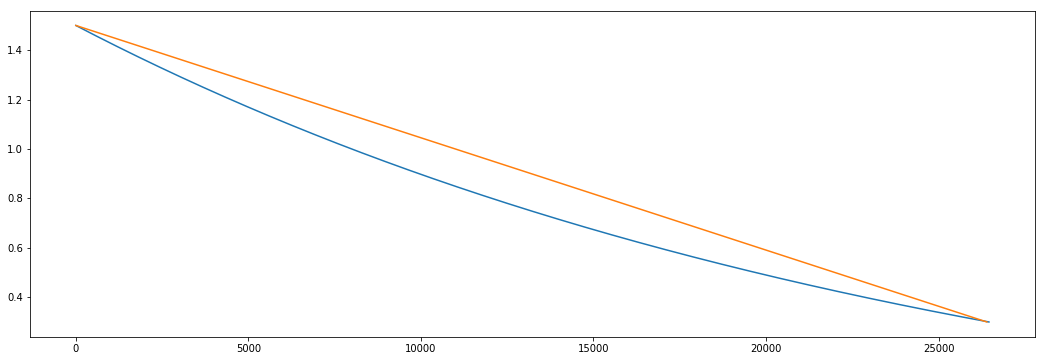

In [10]:
plot_attacks(1.5, 0.3, 600, 44100, 0.55)

expected attack samples: 11568.0
attack coef: 0.000122491288805
reached target in 11568 samples


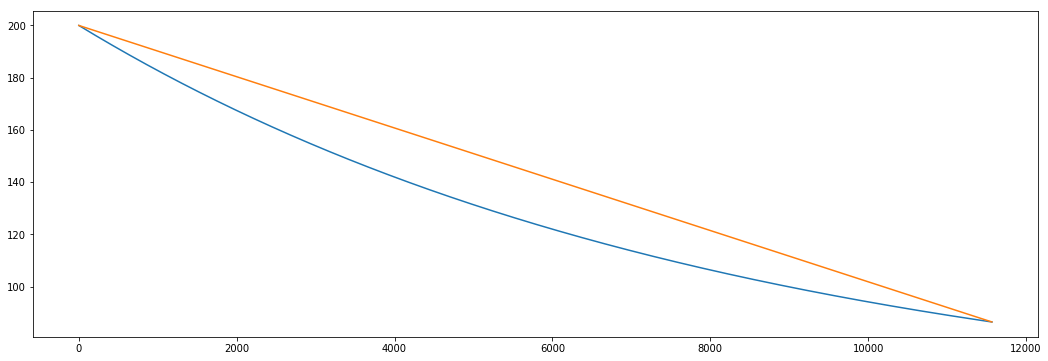

In [11]:
plot_attacks(200, 86.5, 241, 48000, 0.32)

expected attack samples: 11568.0
attack coef: 0.000339830352527
reached target in 11567 samples


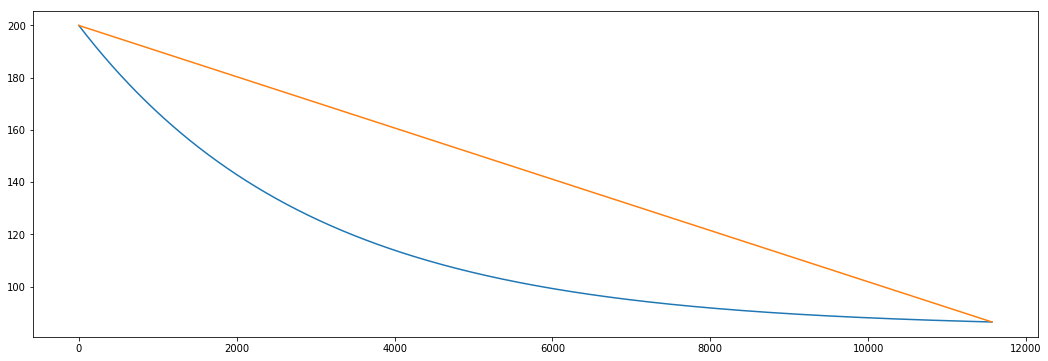

In [12]:
plot_attacks(200, 86.5, 241, 48000, 0.02)